In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/rawdata.csv')
data

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 방류량 결측치 처리

In [268]:
bangryu = data[['날짜', '방류량']]

In [269]:
bangryu.날짜 = pd.to_datetime(bangryu.날짜)
bangryu

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2796824354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangryu.날짜 = pd.to_datetime(bangryu.날짜)


,날짜,방류량
0,2012-05-01 00:00:00,555.00
1,2012-05-01 00:10:00,562.90
2,2012-05-01 00:20:00,576.40
3,2012-05-01 00:30:00,563.10
4,2012-05-01 00:40:00,576.40
...,...,...
276331,2022-07-18 23:10:00,259.23
276332,2022-07-18 23:20:00,260.46
276333,2022-07-18 23:30:00,259.37
276334,2022-07-18 23:40:00,259.13


In [270]:
bangryu[bangryu['방류량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,방류량
13200,2012-07-31 16:00:00,NaN
68081,2014-08-13 18:50:00,NaN
68083,2014-08-13 19:10:00,NaN
68084,2014-08-13 19:20:00,NaN
68085,2014-08-13 19:30:00,NaN
...,...,...
272217,2022-06-20 09:30:00,NaN
272218,2022-06-20 09:40:00,NaN
272219,2022-06-20 09:50:00,NaN
272220,2022-06-20 10:00:00,NaN


In [271]:
nan_index = list(bangryu[bangryu['방류량'].isnull()].index)

In [272]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [273]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [274]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [275]:
# 데이터프레임 분리

bangryu_interpolate = bangryu.copy()
bangryu_interpolate = bangryu_interpolate.set_index('날짜')
bangryu_interpolate = bangryu_interpolate.iloc[index_interpolate_, :]
bangryu_interpolate

,방류량
날짜,
2012-07-31 15:50:00,775.40
2012-07-31 16:00:00,NaN
2012-07-31 16:10:00,777.60
2014-08-13 18:40:00,776.80
2014-08-13 18:50:00,NaN
...,...
2021-10-06 08:20:00,NaN
2021-10-06 08:30:00,336.00
2022-06-16 00:30:00,137.33


In [276]:
# 보간

bangryu_interpolate.interpolate(method='time', inplace=True)
bangryu_interpolate   # 보간 결과 확인

,방류량
날짜,
2012-07-31 15:50:00,775.400
2012-07-31 16:00:00,776.500
2012-07-31 16:10:00,777.600
2014-08-13 18:40:00,776.800
2014-08-13 18:50:00,762.400
...,...
2021-10-06 08:20:00,335.000
2021-10-06 08:30:00,336.000
2022-06-16 00:30:00,137.330


In [277]:
bangryu_interpolate.isnull().sum()

방류량    0
dtype: int64

In [278]:
bangryu = bangryu.set_index('날짜')
bangryu.loc[bangryu_interpolate.index] = bangryu_interpolate
bangryu.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

방류량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [279]:
#!pip install pmdarima

In [280]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [281]:
index_sarima[0]

68083

In [282]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[68083, 68084, 68085, 68086, 68087], [68089, 68090, 68091, 68092, 68093], [68095, 68096, 68097, 68098, 68099], [68101, 68102, 68103, 68104], [81560, 81561, 81562, 81563], [81565, 81566, 81567, 81568], [123622, 123623], [123625, 123626, 123627, 123628, 123629], [132986, 132987, 132988, 132989], [132991, 132992, 132993, 132994, 132995], [132997, 132998, 132999], [133003, 133004], [156158, 156159], [165428, 165429, 165430, 165431, 165432, 165433, 165434, 165435, 165436, 165437, 165438, 165439, 165440, 165441, 165442, 165443, 165444, 165445, 165446, 165447, 165448, 165449, 165450, 165451, 165452, 165453, 165454, 165455, 165456, 165457, 165458, 165459, 165460, 165461, 165462, 165463, 165464, 165465], [166263, 166264], [174173, 174174], [186388, 186389, 186390, 186391], [186424, 186425, 186426, 186427, 186428, 186429, 186430, 186431, 186432, 186433, 186434, 186435, 186436, 186437, 186438, 186439, 186440, 186441, 186442, 186443, 186444, 186445, 186446, 186447, 186448, 186449, 186450, 186451,

In [283]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [284]:
len(total) #결측치 처리해야 하는 구간의 수

38

In [285]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(bangryu[start-60:start], seasonal=True)
  bangryu.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,0,4)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\sjkan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_param

In [286]:
# 결측치가 모두 처리되었는지 확인

bangryu.isnull().sum()

방류량    0
dtype: int64

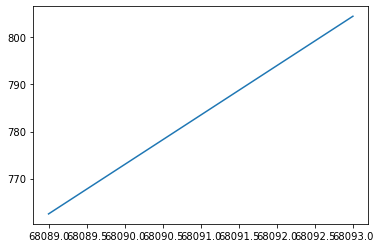

In [287]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[1], bangryu.iloc[total[1], 0])
plt.show()

# 강화대교 조위 결측치 처리

In [288]:
gangwha = data[['날짜', '강화대교_조위']]

In [289]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\4062866498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangwha.날짜 = pd.to_datetime(gangwha.날짜)


,날짜,강화대교_조위
0,2012-05-01 00:00:00,445.0
1,2012-05-01 00:10:00,449.0
2,2012-05-01 00:20:00,451.0
3,2012-05-01 00:30:00,452.0
4,2012-05-01 00:40:00,450.0
...,...,...
276331,2022-07-18 23:10:00,510.0
276332,2022-07-18 23:20:00,492.0
276333,2022-07-18 23:30:00,475.0
276334,2022-07-18 23:40:00,458.0


In [290]:
gangwha[gangwha['강화대교_조위'].isnull()]   # 4927개의 결측치 : 순서대로 채우기

,날짜,강화대교_조위
193,2012-05-02 08:10:00,NaN
307,2012-05-03 03:10:00,NaN
1359,2012-05-10 10:30:00,NaN
1377,2012-05-10 13:30:00,NaN
1378,2012-05-10 13:40:00,NaN
...,...,...
267172,2022-05-16 08:40:00,NaN
270004,2022-06-05 00:40:00,NaN
270383,2022-06-07 15:50:00,NaN
272504,2022-06-22 09:20:00,NaN


In [291]:
nan_index = list(gangwha[gangwha['강화대교_조위'].isnull()].index)

In [292]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-2:])
nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [293]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [294]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [295]:
# 데이터프레임 분리

gangwha_interpolate = gangwha.copy()
gangwha_interpolate = gangwha_interpolate.set_index('날짜')
gangwha_interpolate = gangwha_interpolate.iloc[index_interpolate_, :]
gangwha_interpolate

,강화대교_조위
날짜,
2012-05-02 08:00:00,139.0
2012-05-02 08:10:00,NaN
2012-05-02 08:20:00,124.0
2012-05-03 03:00:00,555.0
2012-05-03 03:10:00,NaN
...,...
2022-06-22 09:20:00,NaN
2022-06-22 09:30:00,347.0
2022-07-04 13:30:00,291.0


In [296]:
# 보간

gangwha_interpolate.interpolate(method='time', inplace=True)
gangwha_interpolate   # 보간 결과 확인

,강화대교_조위
날짜,
2012-05-02 08:00:00,139.0
2012-05-02 08:10:00,131.5
2012-05-02 08:20:00,124.0
2012-05-03 03:00:00,555.0
2012-05-03 03:10:00,555.5
...,...
2022-06-22 09:20:00,328.0
2022-06-22 09:30:00,347.0
2022-07-04 13:30:00,291.0


In [297]:
gangwha_interpolate.isnull().sum()

강화대교_조위    0
dtype: int64

In [298]:
gangwha = gangwha.set_index('날짜')
gangwha.loc[gangwha_interpolate.index] = gangwha_interpolate
gangwha.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

강화대교_조위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [299]:
#!pip install pmdarima

In [300]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [301]:
index_sarima[0]

1377

In [302]:
gangwha

,강화대교_조위
날짜,
2012-05-01 00:00:00,445.0
2012-05-01 00:10:00,449.0
2012-05-01 00:20:00,451.0
2012-05-01 00:30:00,452.0
2012-05-01 00:40:00,450.0
...,...
2022-07-18 23:10:00,510.0
2022-07-18 23:20:00,492.0
2022-07-18 23:30:00,475.0


In [303]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
temp = index_sarima[-6:]
#print(temp)
total.append(temp)
print(total)

[[1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 15

In [304]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [305]:
# 1일, 즉 직전 144 row를 반영하여 결측치 처리

for range in total[:-2]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-60:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [306]:
for range in [total[-2]]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-4032:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))

In [307]:
for range in [total[-1]]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-60:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))

In [308]:
# 결측치가 모두 처리되었는지 확인

gangwha.isnull().sum()

강화대교_조위    0
dtype: int64

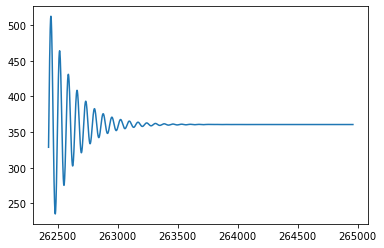

In [309]:
# 결측치 처리 형태 확인 (일곱 번째 구간)

plt.plot(total[-2], gangwha.iloc[total[-2], 0])
plt.show()

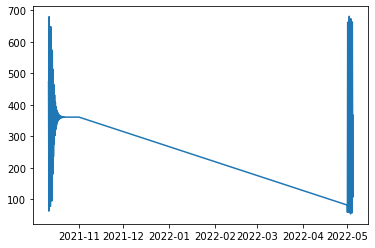

In [310]:
plt.plot(gangwha[262000:265500])

# 청담대교 유량 결측치 처리

In [311]:
chungdam = data[['날짜', '청담대교_유량']]

In [312]:
chungdam.날짜 = pd.to_datetime(chungdam.날짜)
chungdam

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\1174405392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chungdam.날짜 = pd.to_datetime(chungdam.날짜)


,날짜,청담대교_유량
0,2012-05-01 00:00:00,469.05
1,2012-05-01 00:10:00,498.00
2,2012-05-01 00:20:00,490.68
3,2012-05-01 00:30:00,476.21
4,2012-05-01 00:40:00,476.21
...,...,...
276331,2022-07-18 23:10:00,319.84
276332,2022-07-18 23:20:00,314.01
276333,2022-07-18 23:30:00,387.55
276334,2022-07-18 23:40:00,454.91


In [313]:
chungdam[chungdam['청담대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,청담대교_유량
80994,2015-05-11 11:00:00,NaN
80995,2015-05-11 11:10:00,NaN
80996,2015-05-11 11:20:00,NaN
80997,2015-05-11 11:30:00,NaN
80998,2015-05-11 11:40:00,NaN
...,...,...
273775,2022-07-01 05:10:00,NaN
273776,2022-07-01 05:20:00,NaN
273777,2022-07-01 05:30:00,NaN
273778,2022-07-01 05:40:00,NaN


In [314]:
nan_index = list(chungdam[chungdam['청담대교_유량'].isnull()].index)

In [315]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [316]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [317]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [318]:
# 데이터프레임 분리

chungdam_interpolate = chungdam.copy()
chungdam_interpolate = chungdam_interpolate.set_index('날짜')
chungdam_interpolate = chungdam_interpolate.iloc[index_interpolate_, :]
chungdam_interpolate

,청담대교_유량
날짜,
2015-05-26 07:30:00,243.29
2015-05-26 07:40:00,NaN
2015-05-26 07:50:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 08:00:00,NaN
...,...
2022-06-21 10:10:00,NaN
2022-06-21 10:20:00,243.29
2022-06-21 10:20:00,243.29


In [319]:
# 보간

chungdam_interpolate.interpolate(method='time', inplace=True)
chungdam_interpolate   # 보간 결과 확인

,청담대교_유량
날짜,
2015-05-26 07:30:00,243.29
2015-05-26 07:40:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 08:00:00,243.29
...,...
2022-06-21 10:10:00,243.29
2022-06-21 10:20:00,243.29
2022-06-21 10:20:00,243.29


In [320]:
chungdam_interpolate.isnull().sum()

청담대교_유량    0
dtype: int64

In [321]:
chungdam = chungdam.set_index('날짜')
chungdam.loc[chungdam_interpolate.index] = chungdam_interpolate
chungdam.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

청담대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [322]:
#!pip install pmdarima

In [323]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [324]:
index_sarima[0]

80994

In [325]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[80994, 80995, 80996, 80997, 80998, 80999, 81000, 81001, 81002, 81003, 81004, 81005, 81006, 81007], [83021, 83022], [83138, 83139], [83141, 83142, 83143, 83144], [83146, 83147, 83148], [83151, 83152, 83153, 83154], [83156, 83157, 83158, 83159, 83160, 83161, 83162, 83163, 83164, 83165, 83166, 83167, 83168, 83169, 83170, 83171, 83172, 83173, 83174, 83175], [83228, 83229, 83230, 83231], [83237, 83238, 83239, 83240], [83248, 83249, 83250, 83251, 83252, 83253, 83254, 83255], [83259, 83260, 83261, 83262, 83263, 83264, 83265, 83266, 83267, 83268, 83269, 83270, 83271, 83272, 83273, 83274, 83275, 83276, 83277, 83278, 83279, 83280, 83281, 83282, 83283, 83284, 83285, 83286, 83287, 83288, 83289, 83290, 83291, 83292, 83293, 83294, 83295, 83296, 83297, 83298, 83299, 83300, 83301, 83302, 83303, 83304, 83305, 83306, 83307, 83308, 83309], [83311, 83312, 83313, 83314, 83315, 83316, 83317, 83318, 83319, 83320, 83321, 83322, 83323, 83324, 83325, 83326, 83327, 83328, 83329, 83330, 83331, 83332, 83333, 833

In [326]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [327]:
len(total) #결측치 처리해야 하는 구간의 수

586

In [328]:
# 전체 다 1일, 즉 직전 144개의 row을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(chungdam[start-60:start], seasonal=True)
  chungdam.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,0,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper

In [329]:
# 결측치가 모두 처리되었는지 확인

chungdam.isnull().sum()

청담대교_유량    0
dtype: int64

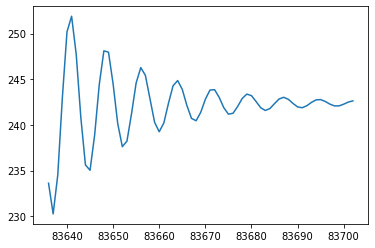

In [330]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[13], chungdam.iloc[total[13], 0])
plt.show()

In [331]:
#total[13] #여기서 i번째 구간 범위 찻아서 아래에 좀 더 넓게 대입

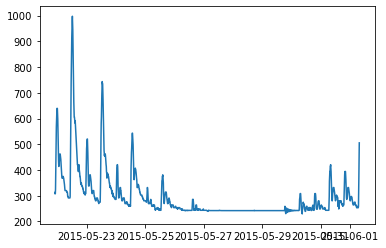

In [332]:
plt.plot(chungdam[82500:84000])

# 한강대교 유량 결측치 처리

In [1069]:
hangang = data[['날짜', '한강대교_유량']]

In [1070]:
hangang.날짜 = pd.to_datetime(hangang.날짜)
hangang

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2676308309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hangang.날짜 = pd.to_datetime(hangang.날짜)


,날짜,한강대교_유량
0,2012-05-01 00:00:00,729.80
1,2012-05-01 00:10:00,731.48
2,2012-05-01 00:20:00,726.42
3,2012-05-01 00:30:00,726.42
4,2012-05-01 00:40:00,707.17
...,...,...
276331,2022-07-18 23:10:00,-456.41
276332,2022-07-18 23:20:00,-717.30
276333,2022-07-18 23:30:00,-843.37
276334,2022-07-18 23:40:00,-1023.37


In [1071]:
hangang[hangang['한강대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,한강대교_유량
91352,2015-07-22 09:20:00,NaN
91353,2015-07-22 09:30:00,NaN
91354,2015-07-22 09:40:00,NaN
91355,2015-07-22 09:50:00,NaN
91356,2015-07-22 10:00:00,NaN
...,...,...
262130,2021-10-12 08:20:00,NaN
262131,2021-10-12 08:30:00,NaN
262132,2021-10-12 08:40:00,NaN
262133,2021-10-12 08:50:00,NaN


In [1072]:
nan_index = list(hangang[hangang['한강대교_유량'].isnull()].index)

In [1073]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [1074]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [1075]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [1076]:
# 데이터프레임 분리

hangang_interpolate = hangang.copy()
hangang_interpolate = hangang_interpolate.set_index('날짜')
hangang_interpolate = hangang_interpolate.iloc[index_interpolate_, :]
hangang_interpolate

,한강대교_유량
날짜,
2020-10-15 10:30:00,473.29
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,505.24


In [1077]:
# 보간

hangang_interpolate.interpolate(method='time', inplace=True)
hangang_interpolate   # 보간 결과 확인

,한강대교_유량
날짜,
2020-10-15 10:30:00,473.290
2020-10-15 10:40:00,489.265
2020-10-15 10:50:00,505.240


In [1078]:
hangang_interpolate.isnull().sum()

한강대교_유량    0
dtype: int64

In [1079]:
hangang = hangang.set_index('날짜')
hangang.loc[hangang_interpolate.index] = hangang_interpolate
hangang.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

한강대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [1080]:
#!pip install pmdarima

In [1081]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [1082]:
index_sarima[0]

91352

In [1083]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[91352, 91353, 91354, 91355, 91356, 91357, 91358, 91359, 91360, 91361, 91362, 91363, 91364, 91365, 91366, 91367, 91368, 91369, 91370, 91371, 91372], [91377, 91378, 91379, 91380, 91381, 91382, 91383, 91384, 91385, 91386, 91387, 91388, 91389, 91390, 91391, 91392, 91393, 91394, 91395, 91396, 91397, 91398, 91399, 91400, 91401, 91402, 91403, 91404, 91405, 91406, 91407, 91408, 91409, 91410, 91411, 91412, 91413, 91414, 91415, 91416, 91417, 91418, 91419, 91420, 91421, 91422, 91423, 91424, 91425, 91426, 91427, 91428, 91429, 91430, 91431, 91432, 91433, 91434, 91435, 91436, 91437, 91438, 91439, 91440, 91441, 91442, 91443, 91444, 91445, 91446, 91447, 91448, 91449, 91450, 91451, 91452, 91453, 91454, 91455, 91456, 91457, 91458, 91459, 91460, 91461, 91462, 91463, 91464, 91465, 91466, 91467, 91468, 91469, 91470, 91471, 91472, 91473, 91474, 91475, 91476, 91477, 91478, 91479, 91480, 91481, 91482, 91483, 91484, 91485, 91486, 91487, 91488, 91489, 91490, 91491, 91492, 91493, 91494, 91495, 91496, 91497, 91

In [1084]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [1085]:
len(total) #결측치 처리해야 하는 구간의 수

14

In [1086]:
# 전체 다 조위 cycle(28일, 즉 직전 144*28=4032개의 row)을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(hangang[start-60:start], seasonal=True)
  hangang.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [1087]:
# 결측치가 모두 처리되었는지 확인

hangang.isnull().sum()

한강대교_유량    0
dtype: int64

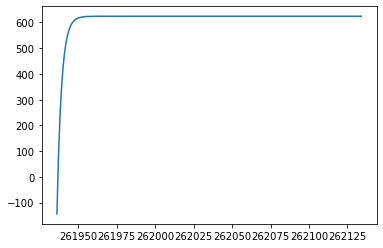

In [1088]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[13], hangang.iloc[total[13], 0])
plt.show()

# 행주대교 유량 결측치 처리

In [247]:
haengju = data[['날짜', '행주대교_유량']]

In [248]:
haengju.날짜 = pd.to_datetime(haengju.날짜)
haengju

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\3631846245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haengju.날짜 = pd.to_datetime(haengju.날짜)


,날짜,행주대교_유량
0,2012-05-01 00:00:00,540.18
1,2012-05-01 00:10:00,540.18
2,2012-05-01 00:20:00,540.18
3,2012-05-01 00:30:00,552.17
4,2012-05-01 00:40:00,564.29
...,...,...
276331,2022-07-18 23:10:00,974.40
276332,2022-07-18 23:20:00,1006.88
276333,2022-07-18 23:30:00,1039.90
276334,2022-07-18 23:40:00,1073.46


In [249]:
haengju[haengju['행주대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,행주대교_유량
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [250]:
nan_index = list(haengju[haengju['행주대교_유량'].isnull()].index)

In [251]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [252]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [253]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [254]:
# 데이터프레임 분리

haengju_interpolate = haengju.copy()
haengju_interpolate = haengju_interpolate.set_index('날짜')
haengju_interpolate = haengju_interpolate.iloc[index_interpolate_, :]
haengju_interpolate

,행주대교_유량
날짜,
2020-10-15 10:30:00,762.23
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,734.09


In [255]:
# 보간

haengju_interpolate.interpolate(method='time', inplace=True)
haengju_interpolate   # 보간 결과 확인

,행주대교_유량
날짜,
2020-10-15 10:30:00,762.23
2020-10-15 10:40:00,748.16
2020-10-15 10:50:00,734.09


In [256]:
haengju_interpolate.isnull().sum()

행주대교_유량    0
dtype: int64

In [257]:
haengju = haengju.set_index('날짜')
haengju.loc[haengju_interpolate.index] = haengju_interpolate
haengju.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

행주대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [258]:
#!pip install pmdarima

In [259]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [260]:
index_sarima[0]

140613

In [261]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [262]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [263]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [264]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(haengju[start-144:start], seasonal=True)
  haengju.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [265]:
# 결측치가 모두 처리되었는지 확인

haengju.isnull().sum()

행주대교_유량    0
dtype: int64

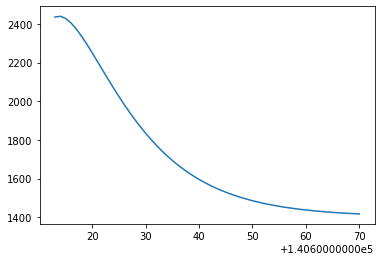

In [266]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], haengju.iloc[total[0], 0])
plt.show()

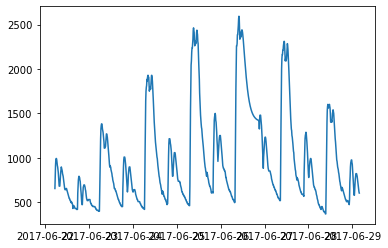

In [267]:
plt.plot(haengju[140000:141000])

# 청담대교 수위 결측치 처리

In [350]:
청담 = data[['날짜', '청담대교_수위']]

In [351]:
청담.날짜 = pd.to_datetime(청담.날짜)
청담

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2565458255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  청담.날짜 = pd.to_datetime(청담.날짜)


,날짜,청담대교_수위
0,2012-05-01 00:00:00,310.7
1,2012-05-01 00:10:00,314.7
2,2012-05-01 00:20:00,313.7
3,2012-05-01 00:30:00,311.7
4,2012-05-01 00:40:00,311.7
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [352]:
청담[청담['청담대교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,청담대교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [353]:
nan_index = list(청담[청담['청담대교_수위'].isnull()].index)

In [354]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [355]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [356]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [357]:
# 데이터프레임 분리

청담_보간 = 청담.copy()
청담_보간 = 청담_보간.set_index('날짜')
청담_보간 = 청담_보간.iloc[index_interpolate_, :]
청담_보간

,청담대교_수위
날짜,
2020-10-15 10:30:00,317.7
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,314.7


In [363]:
# 보간

청담_보간.interpolate(method='time', inplace=True)
청담_보간   # 보간 결과 확인

,청담대교_수위
날짜,
2020-10-15 10:30:00,317.7
2020-10-15 10:40:00,316.2
2020-10-15 10:50:00,314.7


In [364]:
청담_보간.isnull().sum()

청담대교_수위    0
dtype: int64

In [366]:
청담.loc[청담_보간.index] = 청담_보간
청담.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

청담대교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [367]:
#!pip install pmdarima

In [368]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [369]:
index_sarima[0]

140613

In [370]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [371]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [372]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [496]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(청담[start-65:start], seasonal=True)
  청담.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [497]:
# 결측치가 모두 처리되었는지 확인

청담.isnull().sum()

청담대교_수위    0
dtype: int64

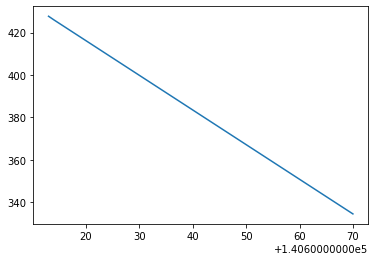

In [498]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 청담.iloc[total[0], 0])
plt.show()

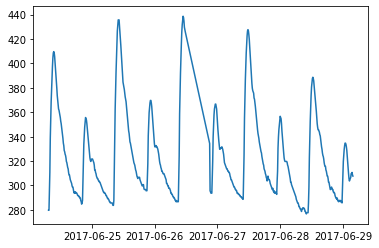

In [499]:
plt.plot(청담[140300:141000])
#plt.plot(청담[140820:140960])

# 잠수교 수위 결측치 처리

In [474]:
잠수 = data[['날짜', '잠수교_수위']]

In [475]:
잠수.날짜 = pd.to_datetime(잠수.날짜)
잠수

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\3140268960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  잠수.날짜 = pd.to_datetime(잠수.날짜)


,날짜,잠수교_수위
0,2012-05-01 00:00:00,300.2
1,2012-05-01 00:10:00,300.2
2,2012-05-01 00:20:00,301.2
3,2012-05-01 00:30:00,301.2
4,2012-05-01 00:40:00,301.2
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [476]:
잠수[잠수['잠수교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,잠수교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [477]:
nan_index = list(잠수[잠수['잠수교_수위'].isnull()].index)

In [478]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [479]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [480]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [481]:
# 데이터프레임 분리

잠수_보간 = 잠수.copy()
잠수_보간 = 잠수_보간.set_index('날짜')
잠수_보간 = 잠수_보간.iloc[index_interpolate_, :]
잠수_보간

,잠수교_수위
날짜,
2020-10-15 10:30:00,330.2
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,326.2


In [482]:
# 보간

잠수_보간.interpolate(method='time', inplace=True)
잠수_보간   # 보간 결과 확인

,잠수교_수위
날짜,
2020-10-15 10:30:00,330.2
2020-10-15 10:40:00,328.2
2020-10-15 10:50:00,326.2


In [483]:
잠수_보간.isnull().sum()

잠수교_수위    0
dtype: int64

In [485]:
잠수 = 잠수.set_index('날짜')
잠수.loc[잠수_보간.index] = 잠수_보간
잠수.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

잠수교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [486]:
#!pip install pmdarima

In [487]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [488]:
index_sarima[0]

140613

In [489]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [490]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [491]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [625]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(잠수[start-150:start], seasonal=True)
  잠수.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [626]:
# 결측치가 모두 처리되었는지 확인

잠수.isnull().sum()

잠수교_수위    0
dtype: int64

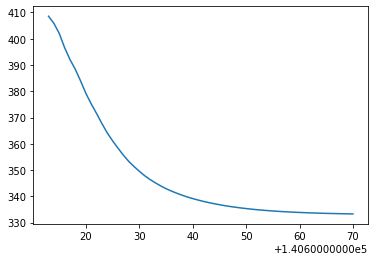

In [627]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 잠수.iloc[total[0], 0])
plt.show()

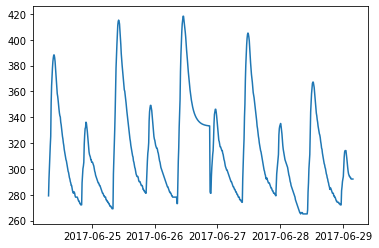

In [628]:
plt.plot(잠수[140300:141000])

# 한강대교 수위 결측치 처리

In [629]:
한강 = data[['날짜', '한강대교_수위']]

In [630]:
한강.날짜 = pd.to_datetime(한강.날짜)
한강

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2998615949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  한강.날짜 = pd.to_datetime(한강.날짜)


,날짜,한강대교_수위
0,2012-05-01 00:00:00,290.0
1,2012-05-01 00:10:00,290.0
2,2012-05-01 00:20:00,290.0
3,2012-05-01 00:30:00,290.0
4,2012-05-01 00:40:00,291.0
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [631]:
한강[한강['한강대교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,한강대교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [632]:
nan_index = list(한강[한강['한강대교_수위'].isnull()].index)

In [633]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [634]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [635]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [636]:
# 데이터프레임 분리

한강_보간 = 한강.copy()
한강_보간 = 한강_보간.set_index('날짜')
한강_보간 = 한강_보간.iloc[index_interpolate_, :]
한강_보간

,한강대교_수위
날짜,
2020-10-15 10:30:00,312.0
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,308.0


In [637]:
# 보간

한강_보간.interpolate(method='time', inplace=True)
한강_보간   # 보간 결과 확인

,한강대교_수위
날짜,
2020-10-15 10:30:00,312.0
2020-10-15 10:40:00,310.0
2020-10-15 10:50:00,308.0


In [638]:
한강_보간.isnull().sum()

한강대교_수위    0
dtype: int64

In [639]:
한강 = 한강.set_index('날짜')
한강.loc[한강_보간.index] = 한강_보간
한강.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

한강대교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [640]:
#!pip install pmdarima

In [641]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [642]:
index_sarima[0]

140613

In [643]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [644]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [645]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [777]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(한강[start-72:start], seasonal=True)
  한강.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [778]:
# 결측치가 모두 처리되었는지 확인

한강.isnull().sum()

한강대교_수위    0
dtype: int64

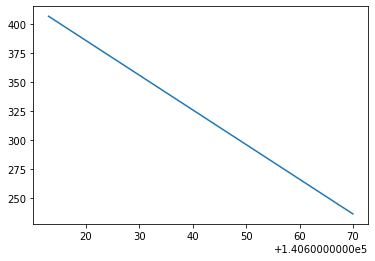

In [779]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 한강.iloc[total[0], 0])
plt.show()

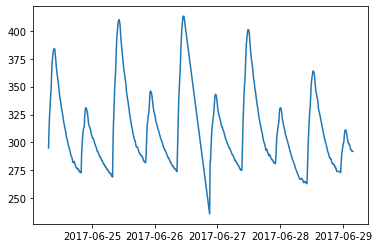

In [780]:
plt.plot(한강[140300:141000])

# 행주대교 수위 결측치 처리

In [781]:
행주 = data[['날짜', '행주대교_수위']]

In [782]:
행주.날짜 = pd.to_datetime(행주.날짜)
행주

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\232517616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  행주.날짜 = pd.to_datetime(행주.날짜)


,날짜,행주대교_수위
0,2012-05-01 00:00:00,275.3
1,2012-05-01 00:10:00,275.3
2,2012-05-01 00:20:00,275.3
3,2012-05-01 00:30:00,276.3
4,2012-05-01 00:40:00,277.3
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [783]:
행주[행주['행주대교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,행주대교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [784]:
nan_index = list(행주[행주['행주대교_수위'].isnull()].index)

In [785]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [786]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [787]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [788]:
# 데이터프레임 분리

행주_보간 = 행주.copy()
행주_보간 = 행주_보간.set_index('날짜')
행주_보간 = 행주_보간.iloc[index_interpolate_, :]
행주_보간

,행주대교_수위
날짜,
2020-10-15 10:30:00,292.3
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,290.3


In [789]:
# 보간

행주_보간.interpolate(method='time', inplace=True)
행주_보간   # 보간 결과 확인

,행주대교_수위
날짜,
2020-10-15 10:30:00,292.3
2020-10-15 10:40:00,291.3
2020-10-15 10:50:00,290.3


In [790]:
행주_보간.isnull().sum()

행주대교_수위    0
dtype: int64

In [791]:
행주 = 행주.set_index('날짜')
행주.loc[행주_보간.index] = 행주_보간
행주.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

행주대교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [792]:
#!pip install pmdarima

In [793]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [794]:
index_sarima[0]

140613

In [795]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [796]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [797]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [886]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(행주[start-388:start], seasonal=True)
  행주.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [887]:
# 결측치가 모두 처리되었는지 확인

행주.isnull().sum()

행주대교_수위    0
dtype: int64

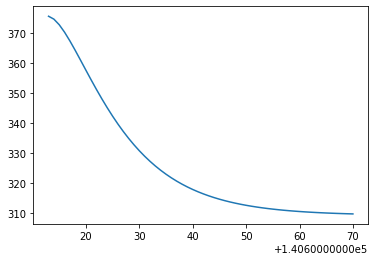

In [888]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 행주.iloc[total[0], 0])
plt.show()

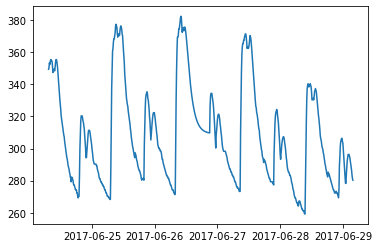

In [889]:
plt.plot(행주[140300:141000])

# rawdata_arima, newdata 생성

In [932]:
광진교_수위 = pd.read_csv('data/외부데이터/광진교_수위.csv', encoding = 'cp949')
광진교_수위.날짜 = pd.to_datetime(광진교_수위.날짜)
광진교_수위 = 광진교_수위.set_index('날짜')
광진교_수위

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\1099726902.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  광진교_수위 = pd.read_csv('data/외부데이터/광진교_수위.csv', encoding = 'cp949')


,광진교_수위
날짜,
2012-05-01 00:00:00,1.2
2012-05-01 00:10:00,1.2
2012-05-01 00:20:00,1.2
2012-05-01 00:30:00,1.2
2012-05-01 00:40:00,1.2
...,...
2022-07-18 23:10:00,1.12
2022-07-18 23:20:00,1.12
2022-07-18 23:30:00,1.12


# 광진교 수위 결측치 처리

In [1026]:
광진 = 광진교_수위.reset_index()
광진

,날짜,광진교_수위
0,2012-05-01 00:00:00,1.2
1,2012-05-01 00:10:00,1.2
2,2012-05-01 00:20:00,1.2
3,2012-05-01 00:30:00,1.2
4,2012-05-01 00:40:00,1.2
...,...,...
276331,2022-07-18 23:10:00,1.12
276332,2022-07-18 23:20:00,1.12
276333,2022-07-18 23:30:00,1.12
276334,2022-07-18 23:40:00,1.12


In [1027]:
idx = 광진[광진['광진교_수위'] == '-']['광진교_수위'].index
idx

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [1028]:
import numpy as np
for i in idx:
    광진.loc[i,'광진교_수위']=np.NaN
광진

,날짜,광진교_수위
0,2012-05-01 00:00:00,1.2
1,2012-05-01 00:10:00,1.2
2,2012-05-01 00:20:00,1.2
3,2012-05-01 00:30:00,1.2
4,2012-05-01 00:40:00,1.2
...,...,...
276331,2022-07-18 23:10:00,1.12
276332,2022-07-18 23:20:00,1.12
276333,2022-07-18 23:30:00,1.12
276334,2022-07-18 23:40:00,1.12


In [1029]:
광진[광진['광진교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,광진교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [1030]:
nan_index = idx

In [1031]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## 1. 비연속적 결측값 처리 by Interpolation

In [1032]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [1033]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [1034]:
# 데이터프레임 분리

광진_보간 = 광진.copy()
광진_보간 = 광진_보간.set_index('날짜')
광진_보간 = 광진_보간.iloc[index_interpolate_, :]
광진_보간

,광진교_수위
날짜,
2020-10-15 10:30:00,1.07
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,1.07


In [1035]:
# 보간

광진_보간.iloc[1]=1.07
광진_보간   # 보간 결과 확인

,광진교_수위
날짜,
2020-10-15 10:30:00,1.07
2020-10-15 10:40:00,1.07
2020-10-15 10:50:00,1.07


In [1036]:
광진_보간.isnull().sum()

광진교_수위    0
dtype: int64

In [1037]:
광진 = 광진.set_index('날짜')
광진.loc[광진_보간.index] = 광진_보간
광진.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

광진교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [1038]:
#!pip install pmdarima

In [1039]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [1040]:
index_sarima[0]

140613

In [1041]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [1042]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [1043]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [1044]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(광진[start-72:start], seasonal=True)
  광진.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [1045]:
# 결측치가 모두 처리되었는지 확인

광진.isnull().sum()

광진교_수위    0
dtype: int64

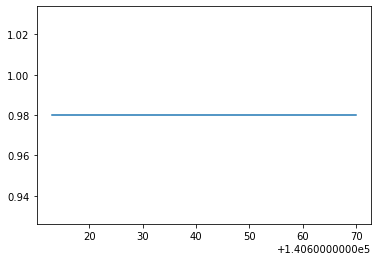

In [1046]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(range, 광진.iloc[range, 0])
plt.show()

In [1059]:
광진 = 광진.reset_index()
광진.날짜 = pd.to_datetime(광진.날짜)
광진 = 광진.set_index('날짜')
광진

,광진교_수위
날짜,
2012-05-01 00:00:00,1.2
2012-05-01 00:10:00,1.2
2012-05-01 00:20:00,1.2
2012-05-01 00:30:00,1.2
2012-05-01 00:40:00,1.2
...,...
2022-07-18 23:10:00,1.12
2022-07-18 23:20:00,1.12
2022-07-18 23:30:00,1.12


In [1062]:
서울시강수량 = pd.read_csv('data/외부데이터/서울시강수량.csv', usecols=[1])
서울시강수량 = pd.concat([data['날짜'], 서울시강수량], axis = 1)
서울시강수량.날짜 = pd.to_datetime(서울시강수량.날짜)
서울시강수량 = 서울시강수량.set_index('날짜')
서울시강수량

,강수량(mm)
날짜,
2012-05-01 00:00:00,0.0
2012-05-01 00:10:00,0.0
2012-05-01 00:20:00,0.0
2012-05-01 00:30:00,0.0
2012-05-01 00:40:00,0.0
...,...
2022-07-18 23:10:00,0.0
2022-07-18 23:20:00,0.0
2022-07-18 23:30:00,0.0


In [1103]:
data = pd.read_csv('data/rawdata.csv')
data.날짜 = pd.to_datetime(data.날짜)
data2 = data.set_index('날짜')
rawdata_arima = pd.concat([서울시강수량,bangryu,gangwha,chungdam,hangang,haengju,청담,잠수,한강,행주,광진], ignore_index = True, axis = 1)
rawdata_arima.columns = ['강수량(mm)','방류량','강화대교_조위','청담대교_유량','한강대교_유량','행주대교_유량','청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위','광진교_수위']
rawdata_arima = rawdata_arima.reset_index()
rawdata_arima

,날짜,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,광진교_수위
0,2012-05-01 00:00:00,0.0,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,1.2
1,2012-05-01 00:10:00,0.0,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,1.2
2,2012-05-01 00:20:00,0.0,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,1.2
3,2012-05-01 00:30:00,0.0,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,1.2
4,2012-05-01 00:40:00,0.0,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,0.0,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,1.12
276332,2022-07-18 23:20:00,0.0,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,1.12
276333,2022-07-18 23:30:00,0.0,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,1.12
276334,2022-07-18 23:40:00,0.0,259.13,458.0,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,1.12


In [1104]:
rawdata_arima.isnull().sum()

날짜         0
강수량(mm)    0
방류량        0
강화대교_조위    0
청담대교_유량    0
한강대교_유량    0
행주대교_유량    0
청담대교_수위    0
잠수교_수위     0
한강대교_수위    0
행주대교_수위    0
광진교_수위     0
dtype: int64

In [1105]:
rawdata_arima.to_csv('data/rawdata_arima.csv', encoding = 'cp949')

In [1116]:
수위 = pd.read_csv('data/외부데이터/y_test.csv', encoding = 'cp949')
수위.날짜 = pd.to_datetime(수위.날짜)
수위['청담대교_수위'] = 수위['청담대교_수위'] * 100
수위['잠수교_수위'] = 수위['잠수교_수위'] * 100
수위['한강대교_수위'] = 수위['한강대교_수위'] * 100
수위['행주대교_수위'] = 수위['행주대교_수위'] * 100
수위

,날짜,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2022-06-01 00:00:00,279.0,276.0,274.0,269.0
1,2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2,2022-06-01 00:20:00,284.0,277.0,274.0,264.0
3,2022-06-01 00:30:00,285.0,277.0,274.0,261.0
4,2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...,...
6907,2022-07-18 23:10:00,288.0,295.0,299.0,306.0
6908,2022-07-18 23:20:00,287.0,303.0,304.0,308.0
6909,2022-07-18 23:30:00,299.0,307.0,309.0,310.0
6910,2022-07-18 23:40:00,309.0,311.0,314.0,312.0


In [1118]:
수위2 = pd.concat([rawdata_arima[['날짜','청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']][:-6912],수위], ignore_index=True, axis = 0)
수위2

,날짜,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00:00,310.7,300.2,290.0,275.3
1,2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2,2012-05-01 00:20:00,313.7,301.2,290.0,275.3
3,2012-05-01 00:30:00,311.7,301.2,290.0,276.3
4,2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...,...
276331,2022-07-18 23:10:00,288.0,295.0,299.0,306.0
276332,2022-07-18 23:20:00,287.0,303.0,304.0,308.0
276333,2022-07-18 23:30:00,299.0,307.0,309.0,310.0
276334,2022-07-18 23:40:00,309.0,311.0,314.0,312.0


In [1121]:
newdata = pd.concat([수위2['날짜'],rawdata_arima[['강수량(mm)','방류량','강화대교_조위','청담대교_유량','한강대교_유량','행주대교_유량','광진교_수위']],수위2[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]], axis = 1)
newdata

,날짜,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00:00,0.0,555.00,445.0,469.05,729.80,540.18,1.2,310.7,300.2,290.0,275.3
1,2012-05-01 00:10:00,0.0,562.90,449.0,498.00,731.48,540.18,1.2,314.7,300.2,290.0,275.3
2,2012-05-01 00:20:00,0.0,576.40,451.0,490.68,726.42,540.18,1.2,313.7,301.2,290.0,275.3
3,2012-05-01 00:30:00,0.0,563.10,452.0,476.21,726.42,552.17,1.2,311.7,301.2,290.0,276.3
4,2012-05-01 00:40:00,0.0,576.40,450.0,476.21,707.17,564.29,1.2,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,0.0,259.23,510.0,319.84,-456.41,974.40,1.12,288.0,295.0,299.0,306.0
276332,2022-07-18 23:20:00,0.0,260.46,492.0,314.01,-717.30,1006.88,1.12,287.0,303.0,304.0,308.0
276333,2022-07-18 23:30:00,0.0,259.37,475.0,387.55,-843.37,1039.90,1.12,299.0,307.0,309.0,310.0
276334,2022-07-18 23:40:00,0.0,259.13,458.0,454.91,-1023.37,1073.46,1.12,309.0,311.0,314.0,312.0


In [1122]:
newdata.isnull().sum()

날짜         0
강수량(mm)    0
방류량        0
강화대교_조위    0
청담대교_유량    0
한강대교_유량    0
행주대교_유량    0
광진교_수위     0
청담대교_수위    0
잠수교_수위     0
한강대교_수위    0
행주대교_수위    0
dtype: int64

In [1123]:
newdata.to_csv('data/newdata.csv', encoding = 'cp949')

# 파생컬럼 생성 - 시간차 적용(강화대교_조위, 방류량)

## 강화대교 조위

In [3]:
newdata = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [4]:
#시간차 적용을 위한 4월 데이터(조위df) 불러오기

from glob import glob

w_list = sorted(glob("data/외부데이터/강화대교_조위_4월 29,30일/*.csv"))
w_list

['data/외부데이터/강화대교_조위_4월 29,30일\\2012.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2013.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2014.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2015.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2016.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2017.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2018.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2019.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2020.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2021.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2022.csv']

In [10]:
idx = [0]
for i in range(1430):
  if (i+1) % 10 == 0:
    idx.append(i+1)

idx2 = []
for i in range(12):
  idx2.append(i*144)

tmp3 = []

for i in range(11):
  a = pd.read_csv(w_list[i], encoding='cp949', usecols = [0,1])
  a = a[:1440]
  tmp3.append(a.iloc[idx].set_index(pd.Index(list(range(i+idx2[i],i+idx2[i]+144)))))

조위df = pd.concat([tmp3[0],tmp3[1],tmp3[2],tmp3[3],tmp3[4],tmp3[5],tmp3[6],tmp3[7],tmp3[8],tmp3[9],tmp3[10]])
조위df.columns = ['날짜', '강화대교_조위']

조위df[조위df['강화대교_조위']=='-']

,날짜,강화대교_조위
1435,2021-04-30 21:40,-
1591,2022-04-30 23:30,-


In [13]:
조위df.loc[1435]['강화대교_조위'] = 544
조위df.loc[1591]['강화대교_조위'] = 143

In [15]:
#다리별 시간차 계산

idx3 = []
for i in range(12):
  idx3.append(i*26496)

ttmp = []
for i in range(0, 144): 
  
  push_num = i
  
  tmp = []
  for j in range(11):
    if j != 10:
      tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','강화대교_조위']]], ignore_index=True))
    else:
      tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','강화대교_조위']]], ignore_index=True))

  push_result = pd.concat(
        [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
    )

  mm = pd.concat([push_result[['강화대교_조위']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
  mm['강화대교_조위'] = mm['강화대교_조위'].astype(float, errors = 'raise')
  nn = mm[:269424]
  push_cor2 = nn.corr()
  
  #print(i, push_cor2.iloc[:,0][1]) #마지막 원소 변경 1,2,3,4
  #ttmp.append(push_cor2.iloc[:,0][1])

  #1번: 청담대교 24 0.31093762145783016    -> 24 0.31008707402679253
  #2번: 잠수교 23 0.3353496289111793       -> 23 0.3344169953069493
  #3번: 한강대교 23 0.34832966441668634    -> 23 0.3475333064344359
  #4번: 행주대교 20 0.3684983352127144     -> 20 0.36719794049834076
  #시간적 순서가 직관과 맞음

  #하나만 꼽으라면 23 -> 23
  print(i, push_cor2.sum()[0])
  ttmp.append(push_cor2.sum()[0])

0 1.0793507420482251
1 1.142769772213913
2 1.207660777137531
3 1.2752539712176643
4 1.345236529923926
5 1.4172370749299965
6 1.4908193478782708
7 1.5654839637324864
8 1.6406672037941137
9 1.7157399923912298
10 1.7900129482669476
11 1.8627475022821538
12 1.933160282339072
13 2.0004444887059534
14 2.063799705730097
15 2.1224452761312316
16 2.1756330682161225
17 2.2226675794356257
18 2.262935366395367
19 2.2959203127591588
20 2.321211253712258
21 2.338514135829233
22 2.3476507334440115
23 2.348566655685426
24 2.3413226398893885
25 2.326087688825877
26 2.3031254966090984
27 2.272772699848008
28 2.235422399841325
29 2.191516014513862
30 2.14154049825084
31 2.0860283150370043
32 2.0255464764909097
33 1.960685483800176
34 1.8920472600279667
35 1.8202534667851984
36 1.745937533799943
37 1.6697384671552342
38 1.5923030410379793
39 1.5142812921943307
40 1.4363211318140228
41 1.3590652079536314
42 1.2831477372662146
43 1.2091810862064023
44 1.1377383789579292
45 1.0693429064993567
46 1.0044559107

In [16]:
#파일 저장

push_num = 23
  
tmp = []
for j in range(11):
  if j != 10:
    tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','강화대교_조위']]], ignore_index=True))
  else:
    tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','강화대교_조위']]], ignore_index=True))

push_result = pd.concat(
      [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
)

mm = pd.concat([push_result[['강화대교_조위']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
mm['강화대교_조위'] = mm['강화대교_조위'].astype(float, errors = 'raise')
nn = mm[:269424]
push_cor2 = nn.corr()
push_cor2

,강화대교_조위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
강화대교_조위,1.000000,0.309298,0.334418,0.347528,0.357322
청담대교_수위,0.309298,1.000000,0.991150,0.990986,0.949497
잠수교_수위,0.334418,0.991150,1.000000,0.995218,0.957848
한강대교_수위,0.347528,0.990986,0.995218,1.000000,0.972335
행주대교_수위,0.357322,0.949497,0.957848,0.972335,1.000000


In [17]:
result = push_result.강화대교_조위
result

0           193
1           199
2           207
3           215
4           226
          ...  
276331    407.0
276332    431.0
276333    453.0
276334    476.0
276335    499.0
Name: 강화대교_조위, Length: 276336, dtype: object

In [19]:
result.to_csv("data/파생컬럼/강화대교_조위_시간차.csv", index = False, encoding = 'cp949', columns = ['강화대교_조위'])

## 방류량

In [20]:
#시간차 적용을 위한 4월 데이터(조위df) 불러오기

from glob import glob

w_list = sorted(glob("data/외부데이터/팔당댐_4월 29,30일/*.csv"))
w_list

['data/외부데이터/팔당댐_4월 29,30일\\2012.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2013.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2014.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2015.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2016.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2017.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2018.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2019.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2020.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2021.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2022.csv']

In [31]:
idx = [0]
for i in range(287):
  idx.append(i)

idx2 = []
for i in range(12):
  idx2.append(i*288)

tmp3 = []

for i in range(11):
  a = pd.read_csv(w_list[i], encoding='cp949', usecols = [0,3])
  tmp3.append(a.iloc[idx].set_index(pd.Index(list(range(i+idx2[i],i+idx2[i]+288)))))

팔당df = pd.concat([tmp3[0],tmp3[1],tmp3[2],tmp3[3],tmp3[4],tmp3[5],tmp3[6],tmp3[7],tmp3[8],tmp3[9],tmp3[10]])
팔당df.columns = ['날짜', '방류량']
팔당df

팔당df[팔당df['방류량']=='-']

,날짜,방류량
1087,2015-04-30 12:30,-
2115,2019-04-29 15:10,-
2988,2022-04-29 16:10,-


In [32]:
팔당df.loc[1087]['방류량'] = 168.2
팔당df.loc[2115]['방류량'] = 368
팔당df.loc[2988]['방류량'] = 125.1

In [34]:
idx3 = []
for i in range(12):
  idx3.append(i*26496)

ttmp = []
for i in range(0, 288): 
  
  push_num = i
  
  tmp = []
  for j in range(11):
    if j != 10:
      tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','방류량']]], ignore_index=True))
    else:
      tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','방류량']]], ignore_index=True))

  push_result = pd.concat(
        [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
    )

  mm = pd.concat([push_result[['방류량']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
  mm['방류량'] = mm['방류량'].astype(float, errors = 'raise')
  nn = mm[:269424]
  push_cor2 = nn.corr()
  
  
  #print(i, push_cor2.iloc[:,0][2]) #마지막 원소 변경 1,2,3,4
  #ttmp.append(push_cor2.iloc[:,0][2])

  #1번: 청담대교 15 0.8970553300325268 -> 15 0.8970394478572508
  #2번: 잠수교   19 0.8748510916903229
  #3번: 한강대교 20 0.8635804208734675
  #4번: 행주대교 21 0.8088005740767352
  #시간적 순서가 직관과 맞음

  #하나만 꼽으라면 19
  print(i, push_cor2.sum()[0])
  ttmp.append(push_cor2.sum()[0])

0 4.4108680959312
1 4.411348784398636
2 4.414304579390693
3 4.417212705383015
4 4.420066329223367
5 4.422857733335674
6 4.425567071111318
7 4.428163344832547
8 4.430606932622472
9 4.432888100068218
10 4.435001917320518
11 4.4369055781979325
12 4.4385893371462215
13 4.440054385835812
14 4.441286630523859
15 4.44228696537453
16 4.443036272929255
17 4.443567496313968
18 4.443832048699757
19 4.443871479651424
20 4.443670094155962
21 4.443222230095935
22 4.44253882180466
23 4.441635466895465
24 4.440521916216472
25 4.439182487770576
26 4.437635459018186
27 4.435894834145289
28 4.433973219161103
29 4.431888392033015
30 4.429626979303972
31 4.4272070573558695
32 4.424637858873679
33 4.42194232435717
34 4.4191120653052565
35 4.416167515441033
36 4.413107771595901
37 4.4099428607937945
38 4.406686865308404
39 4.403347245530859
40 4.399935275545564
41 4.396440834609995
42 4.3928559010120605
43 4.389195112611445
44 4.385478899624395
45 4.381714381593982
46 4.377885951291808
47 4.373983883455815
4

In [35]:
#파일 저장

push_num = 19
  
tmp = []
for j in range(11):
  if j != 10:
    tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','방류량']]], ignore_index=True))
  else:
    tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','방류량']]], ignore_index=True))

push_result = pd.concat(
      [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
)

mm = pd.concat([push_result[['방류량']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
mm['방류량'] = mm['방류량'].astype(float, errors = 'raise')
nn = mm[:269424]
push_cor2 = nn.corr()
push_cor2

,방류량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
방류량,1.000000,0.896659,0.874879,0.863630,0.808704
청담대교_수위,0.896659,1.000000,0.991150,0.990986,0.949497
잠수교_수위,0.874879,0.991150,1.000000,0.995218,0.957848
한강대교_수위,0.863630,0.990986,0.995218,1.000000,0.972335
행주대교_수위,0.808704,0.949497,0.957848,0.972335,1.000000


In [36]:
result = push_result.방류량
result

0          575.7
1          575.3
2          555.0
3          575.7
4          575.4
           ...  
276331    258.67
276332    258.58
276333    258.56
276334    258.65
276335    258.09
Name: 방류량, Length: 276336, dtype: object

In [38]:
result.to_csv("data/파생컬럼/방류량_시간차.csv", index = False, encoding = 'cp949', columns = ['방류량'])